# **보스턴 집값 예측**

다음은 데이터 컬럼에 대한 소개입니다.

- CRIM : town 별 1인당 범죄율

- ZN : 25000 평방피트를 초과하는 거주지역의 비율

- INDUS : 비소매 상업지역이 점유하고 있는 토지의 비율

- CHAS : 찰스강에 대한 더미변수(강의 경계에 있으면 1, 아니면 0)

- NOX : 10ppm 당 일산화 질소 양

- RM : 주택 1가구당 평균 방의 개수

- AGE : 1940년 이전에 건축된 소유주택의 비율

- DIS : 5개의 보스턴 직업센터까지의 거리

- RAD : 방사형 도로 까지의 접근성 지수

- TAX : 10000 달러 당 제산세율

- PTRATIO : town 별 학생/교사 비율

- B : 1000(Bk - 0.63)^2 (Bk 는 town 별 흑인의 비율)

- LSTAT : 인구의 하위계층 비율(%)

- MEDV : 본인 소유의 주택가격 중앙값 (단위 1000$)

⇒ 비율이 데이터에 많다. (scale 이 다를 수도 있으니 scaling 을 해주어야 한다.)

⇒ 범주형 변수가 있어서 범주형 인코딩을 해주어야 한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("./housing.xls")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.shape

(506, 14)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA

### 결측치 여부

na : (not available) 값이 들어갈 자리는 있는데 값이 없음.

NaN : (Not a Number) 값이 들어갈 자리가 있는데, 계산상의 오류 때문에 값이 없음.
  
     (pandas에서는 `isna()`로 na, NaN 둘다 확인. 엄밀히 말하면 na가 NaN을 포함하는 개념)

NULL : 값이 들어갈 자리가 없음

In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# 위 코드를 한번에 보고 싶으면 아래와 같이 해도 됨.
# Series type이기 때문에 sum 하면 모든 column에 대해 더한 값이 나옴
print(type(data.isna().sum()))

print("<결측치 여부 확인> \n")
print("sum of na value : {} \nsum of null value : {}".format(data.isna().sum().sum(), data.isnull().sum().sum()))

<class 'pandas.core.series.Series'>
<결측치 여부 확인> 

sum of na value : 0 
sum of null value : 0


In [8]:
# 결측치가 있는 row를 확인한다.
# 아래 코드가 익숙하지 않으신 분들은 boolean indexing을 검색해보세요 :)
data[data.isnull().any(axis = 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### etc.

In [9]:
# 컬럼 내부에 고유한 값들이 얼마나 들어있는지 확인
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# 데이터 컬럼 확인
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
# Descriptive Statistics(요약통계량)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualization

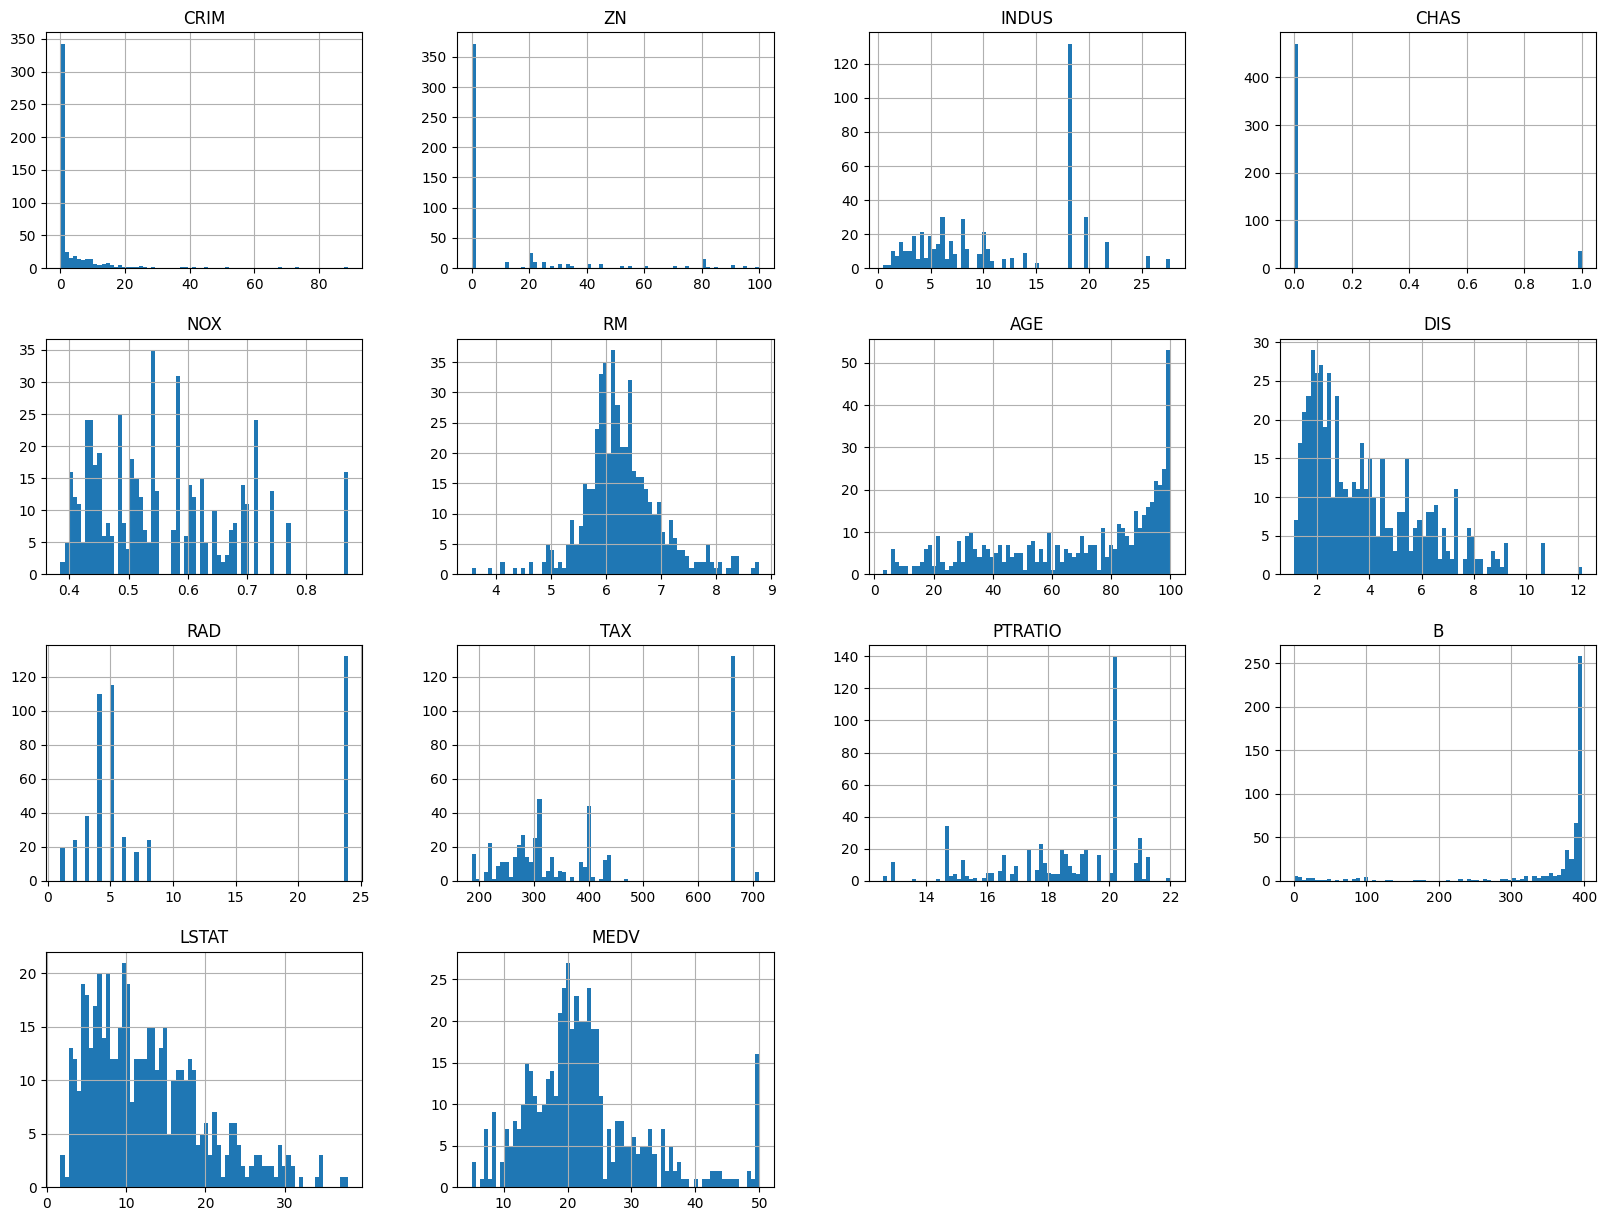

In [12]:
# 히스토그램. 변수(컬럼)별 데이터의 분포 확인
data.hist(bins = 70, figsize = (20, 15))
plt.show()

⇒ RM : Gaussian Distribution?

⇒ DIS, LSTAT : Gamma/Beta/Weibull/Log-Normal Distribution?

⇒ MEDV : has large y's at the right end.

<Axes: >

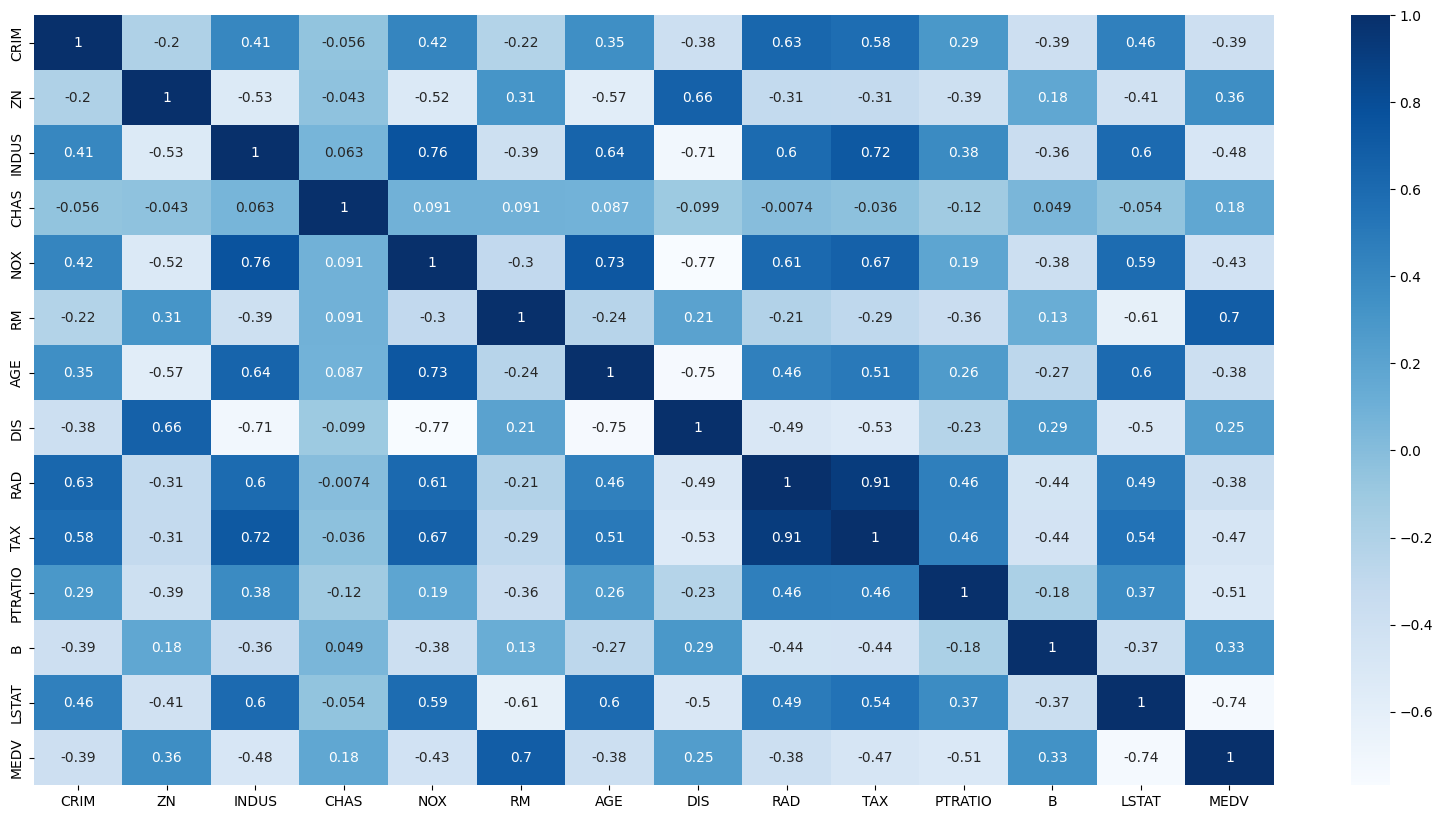

In [13]:
# correlation plot
plt.figure(figsize = (20, 10))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = "Blues")

### Hypothesis Testing

In [14]:
import scipy
import scipy.stats
import math
from scipy.stats import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [16]:
def standardize(df, column, pct_upper, pct_lower):
  # StandardScaler 객체 생성
  sc = StandardScaler()

  # 주어진 데이터프레임(df)에서 해당 열(column)의 값들을 리스트로 추출
  y = df[column].to_list()

  # 리스트 y를 정렬하여 이상치를 제거하기 위한 상위 및 하위 백분율 값 계산
  y.sort()
  len_y = len(y)
  y = y[int(pct_lower * len_y) : int(len_y * pct_upper)]  # 상위와 하위 백분율에 해당하는 범위로 데이터 자르기
  len_y = len(y)

  # StandardScaler가 2D 배열을 기대하므로 1D 배열을 2D 배열로 변환
  y_bracket = ([[x] for x in y])

  # StandardScaler에 데이터를 fitting하여 평균과 표준편차 계산
  sc.fit(y_bracket)

  # 데이터를 표준화하고 1D 배열로 변환
  y_std = sc.transform(y_bracket)
  y_std = y_std.flatten()

  # 표준화된 데이터, 데이터 길이, 백분율 제한을 고려한 잘라낸 데이터 반환
  return y_std, len_y, y


In [17]:
def fit_distribution(df, column, pct_upper, pct_lower, bin_num=70, alpha=0.05):
  """
  주어진 확률분포의 후보 중에서, 가장 likelihood가 비슷하게 parameter optimization을 수행한 뒤,
  데이터의 분포가 해당 parameter의 분포를 따르는지 가설검정을 Chi-Square Goodness of Fit 검정으로 수행함.
  """

  # 주어진 데이터를 standardize 함수를 사용하여 표준화
  y_std, y_size, y_original = standardize(df, column, pct_upper, pct_lower)

  # 검정 대상인 확률분포 후보 리스트
  candidate_dist = ['weibull_min', 'norm', 'weibull_max', 'beta', 'gamma', 'lognorm']

  # 각 확률분포에 대한 Chi-Square 통계량 및 가설검정에 사용할 리스트 초기화
  chi_square_statistics = []
  chi_square_statistics_alpha_upper = []
  chi_square_statistics_alpha_lower = []
  data_follows_candidate = []

  # 백분위수 계산을 위한 구간 설정
  percentile_bins = np.linspace(0, 100, bin_num)
  percentile_cutoffs = np.percentile(y_std, percentile_bins)
  observed_frequency, bins = np.histogram(y_std, bins=percentile_cutoffs)
  cum_observed_frequency = np.cumsum(observed_frequency)

  # 후보 확률분포에 대한 검정 수행
  for distribution in candidate_dist:
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))

    # 예상 누적 분포 계산
    cdf_expected = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
      expected_cdf_area = cdf_expected[bin+1] - cdf_expected[bin]
      expected_frequency.append(expected_cdf_area)

    # 가설검정을 위한 자유도 및 임계치 설정
    param_size = len(param)
    df = (bin_num - 1) - 1 - param_size
    chi_square_statistics_alpha_upper.append(chi2(df).ppf(1 - 0.5 * alpha))
    chi_square_statistics_alpha_lower.append(chi2(df).ppf(0.5 * alpha))

    # 예상 빈도 및 누적 빈도 계산
    expected_frequency = np.array(expected_frequency) * y_size
    cum_expected_frequency = np.cumsum(expected_frequency)

    # Chi-Square 통계량 계산
    ss = round(sum(((cum_expected_frequency - cum_observed_frequency)**2)/cum_expected_frequency), 3)
    chi_square_statistics.append(ss)

    # 가설검정을 통한 결과 판단
    if chi_square_statistics < chi_square_statistics_alpha_upper:
      data_follows_candidate.append(True)
    else:
      data_follows_candidate.append(False)

  # 결과를 DataFrame으로 정리하여 출력
  result = pd.DataFrame()
  result['Distribution'] = candidate_dist
  result['Chi-Square'] = chi_square_statistics
  result['Data follows candidate'] = data_follows_candidate
  result.sort_values(['Chi-Square'], inplace=True)

  print("\n Distributions listed by Betterment of fit:")
  print(".............................................")
  print(result)


candidiate list에 있는 확률분포 후보 설명

- weibull_min: Weibull 분포 중 최솟값을 나타내는 형태로, 일반적으로 신뢰성 분석 등에서 사용.

- norm: 정규 분포(또는 가우시안 분포)는 가장 잘 알려진 분포로, 많은 통계 기법에서 가정으로 사용.

- weibull_max: Weibull 분포 중 최댓값을 나타내는 형태로, 역시 신뢰성 분석 등에서 활용.

- beta: 베타 분포는 0과 1 사이의 값으로 제한된 변수에 대해 사용되는 확률분포.

- gamma: 감마 분포는 양수 값을 가지는 변수에 대한 분포로, 수명 분석 등에서 사용.

- lognorm: 로그-정규 분포는 변수의 로그가 정규 분포를 따를 때 사용되며, 금융 등에서 자주 등장.

🧑Notice : Chi Square Goodness of Fit이 무엇인지 공부해보고, 왜 해당 방법으로 분포 가설검정을 할 수 있는지 대답해보세요 :)


1) 개념  
- Chi-Square Goodness of Fit (적합도 검정)은 통계적으로 분포의 적합성을 평가하는 검정 중 하나이다. 이 검정은 주어진 데이터가 어떤 이론적인 분포를 따르는지를 확인하는 데 사용된다. 특히, 범주형 데이터가 특정 분포와 일치하는지를 검증하는 데 주로 활용된다.

2) 가설 검정 원리  
- 기대 빈도 계산: 주어진 데이터셋의 크기와 기대하는 분포에 따른 비율을 이용하여 각 범주의 기대 빈도를 계산

- 실제 빈도 및 기대 빈도 비교: 각 범주에 대해 실제로 관측된 빈도와 기대 빈도 간의 차이를 계산. 이는 (실제 빈도 - 기대 빈도)^2 / 기대 빈도.

- Chi-Square 통계량 계산: 모든 범주에 대한 차이를 합산하여 Chi-Square 통계량을 계산. 이 통계량은 적합도의 측정 지표로 사용.

- 자유도 및 임계치 결정: Chi-Square 통계량에 대해 자유도를 계산하고, 이를 기반으로 검정에서 사용할 임계치 값을 결정.

- 유의수준과 비교: 결정된 임계치와 유의수준을 비교하여 귀무가설을 기각할지 여부를 결정. Chi-Square 통계량이 임계치보다 크면 귀무가설을 기각.


In [18]:
# RM
# RM 열에 대한 확률분포를 여러 후보 중에서 찾아내고, Chi-Square Goodness of Fit 검정을 수행하여 데이터가 어떤 확률분포를 따르는지 평가
fit_distribution(data, "RM", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(2.2895037664326123, -2.161156830783513, 2.4391564233068346)

(9.99444727222998e-16, 1.0)

(7.036329537505942, 5.906354378627053, 6.317988628808773)

(2.666976000533881, 4.659840027770218, -2.1809059232681234, 5.997023336393134)

(10.362406167070667, -3.2471861790136565, 0.313362119079578)

(0.20286377764808602, -4.919332674533308, 4.819473977607387)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
4        gamma      19.264                    True
0  weibull_min      19.772                    True
5      lognorm      22.856                    True
2  weibull_max      26.381                    True
3         beta      27.433                    True
1         norm     160.859                    True


In [20]:
# DIS
# DIS 열에 대한 확률분포를 여러 후보 중에서 찾아내고, Chi-Square Goodness of Fit 검정을 수행하여 데이터가 어떤 확률분포를 따르는지 평가
fit_distribution(data, "DIS", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(1.1733284284824854, -1.2666504058703396, 1.3347939850598982)

(-1.2493059090287476e-16, 1.0)

(140023532.10470885, 105273688.536161, 105273688.99653134)

(0.6925018676312292, 1.618558005740166, -1.2649277485359798, 3.9551376050731584)

(1.2245089728457499, -1.267198182266995, 1.034850499529866)

(0.7789487294910731, -1.4576986347497796, 1.1114444959977416)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
4        gamma      41.408                    True
0  weibull_min      54.427                    True
5      lognorm     167.741                    True
3         beta     185.482                    True
2  weibull_max    1167.814                    True
1         norm    3571.462                    True


In [21]:
# LSTAT
# LSTAT 열에 대한 확률분포를 여러 후보 중에서 찾아내고, Chi-Square Goodness of Fit 검정을 수행하여 데이터가 어떤 확률분포를 따르는지 평가

fit_distribution(data, "LSTAT", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(1.486158094909508, -1.5215077576913374, 1.677628426680081)

(3.123264772571869e-16, 1.0)

(65.90251607941728, 53.08701683798003, 53.551762056359834)

(1.0853124103830636, 2.0043169760023347, -1.4919991422340126, 4.261378376541812)

(1.9618621988959841, -1.5652323485479853, 0.797829579382749)

(0.43768394826046275, -2.3666149621971426, 2.1575808859125045)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
3         beta       5.956                    True
0  weibull_min      63.197                    True
4        gamma      78.089                    True
5      lognorm     227.585                    True
2  weibull_max     376.387                    True
1         norm    1318.728                    True


In [22]:
# MEDV
# MEDV 열에 대한 확률분포를 여러 후보 중에서 찾아내고, Chi-Square Goodness of Fit 검정을 수행하여 데이터가 어떤 확률분포를 따르는지 평가

fit_distribution(data, "MEDV", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(1.9562997524378387, -1.8834699780450443, 2.122267265149505)

(2.498611818057495e-16, 1.0)

(14.881313661481247, 12.101101270492688, 12.537032010320406)

(2.909648763550582, 10.12712299348065, -2.0142424295166688, 9.024479220362982)

(5.758912630671846, -2.4215500948165847, 0.42048763902179487)

(0.2788940151678918, -3.5478761747613374, 3.4130406618929614)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
0  weibull_min      61.524                    True
3         beta      66.783                    True
4        gamma      70.511                    True
5      lognorm      75.016                    True
2  weibull_max      77.988                    True
1         norm     311.205                    True


In [23]:
scale_columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS','TAX', 'PTRATIO', 'B', 'LSTAT']
scaler = MinMaxScaler()
data[scale_columns] = scaler.fit_transform(data[scale_columns])

In [24]:
X = data.drop(["MEDV"], axis = 1)
y = data["MEDV"]

In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modeling

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
lm.intercept_

24.52345154046136

In [28]:
coef = pd.DataFrame([X_train.columns, lm.coef_]).T
coef = coef.rename(columns = {0: "Variables", 1:"Coefficients"})
coef

,Variables,Coefficients
0,CRIM,-11.874819
1,ZN,3.580891
2,INDUS,1.350978
3,CHAS,3.119835
4,NOX,-7.492692
5,RM,21.174523
6,AGE,-1.050703
7,DIS,-15.241684
8,RAD,0.242727
9,TAX,-4.559971


## Regularization (Ridge, LASSO)

In [34]:
# Ridge 회귀에서 다양한 alpha 값에 대해 모델을 학습하고, 각 alpha 값에 따른 절편 및 계수의 변화를 나타내는 데이터프레임을 생성

from sklearn.linear_model import Ridge

# alpha 값 설정
alpha = np.logspace(-3, 1, 5)

# 각 alpha 값에 대한 Ridge 회귀 모델 학습 및 결과 저장
dat = []
for i, a in enumerate(alpha):
    globals()[f"ridge_{i}"] = Ridge(alpha=a).fit(X_train, y_train)
    dat.append(pd.Series(np.hstack([globals()[f"ridge_{i}"].intercept_, globals()[f"ridge_{i}"].coef_])))

# 결과를 데이터프레임으로 정리
df_ridge = pd.DataFrame(dat, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,24.523139,24.520365,24.496388,24.477672,25.785668
1,-11.868051,-11.807506,-11.236532,-7.673188,-2.231052
2,3.579351,3.565559,3.434193,2.564467,1.481994
3,1.349528,1.336515,1.210037,0.226551,-2.143780
4,3.120363,3.125103,3.171010,3.521733,4.119859
5,-7.489974,-7.465629,-7.232478,-5.604820,-2.374910
6,21.171932,21.148653,20.919478,18.941717,10.596308
7,-1.050395,-1.047641,-1.021568,-0.866973,-1.089251
8,-15.236555,-15.190580,-14.748664,-11.556538,-3.750142
9,0.242646,0.241920,0.234978,0.186124,0.028919


In [35]:
# Lasso 회귀에서 다양한 alpha 값에 대해 모델을 학습하고, 각 alpha 값에 따른 절편 및 계수의 변화를 나타내는 데이터프레임을 생성
# alpha 값에 따른 계수 변화 (LASSO)
from sklearn.linear_model import Lasso
alpha = np.logspace(-3, 1, 5)

dat = []
for i, a in enumerate(alpha):
  globals()[f"lasso_{i}"] = Lasso(alpha = a).fit(X_train, y_train)
  dat.append(pd.Series(np.hstack([globals()[f"lasso_{i}"].intercept_, globals()[f"lasso_{i}"].coef_])))

df_lasso = pd.DataFrame(dat, index = alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,24.498884,24.278021,21.046478,27.152417,25.693315
1,-11.662400,-9.750847,-0.000000,-0.000000,-0.000000
2,3.496599,2.738249,0.000000,0.000000,0.000000
3,1.228274,0.123565,-0.000000,-0.000000,-0.000000
4,3.125720,3.178661,2.922257,0.000000,0.000000
5,-7.375567,-6.321327,-0.000000,-0.000000,-0.000000
6,21.137376,20.802650,18.819801,0.000000,0.000000
7,-1.020848,-0.751934,-0.000000,-0.000000,-0.000000
8,-15.071670,-13.541847,-1.273400,0.000000,0.000000
9,0.237617,0.191630,-0.029899,-0.386944,-0.283698


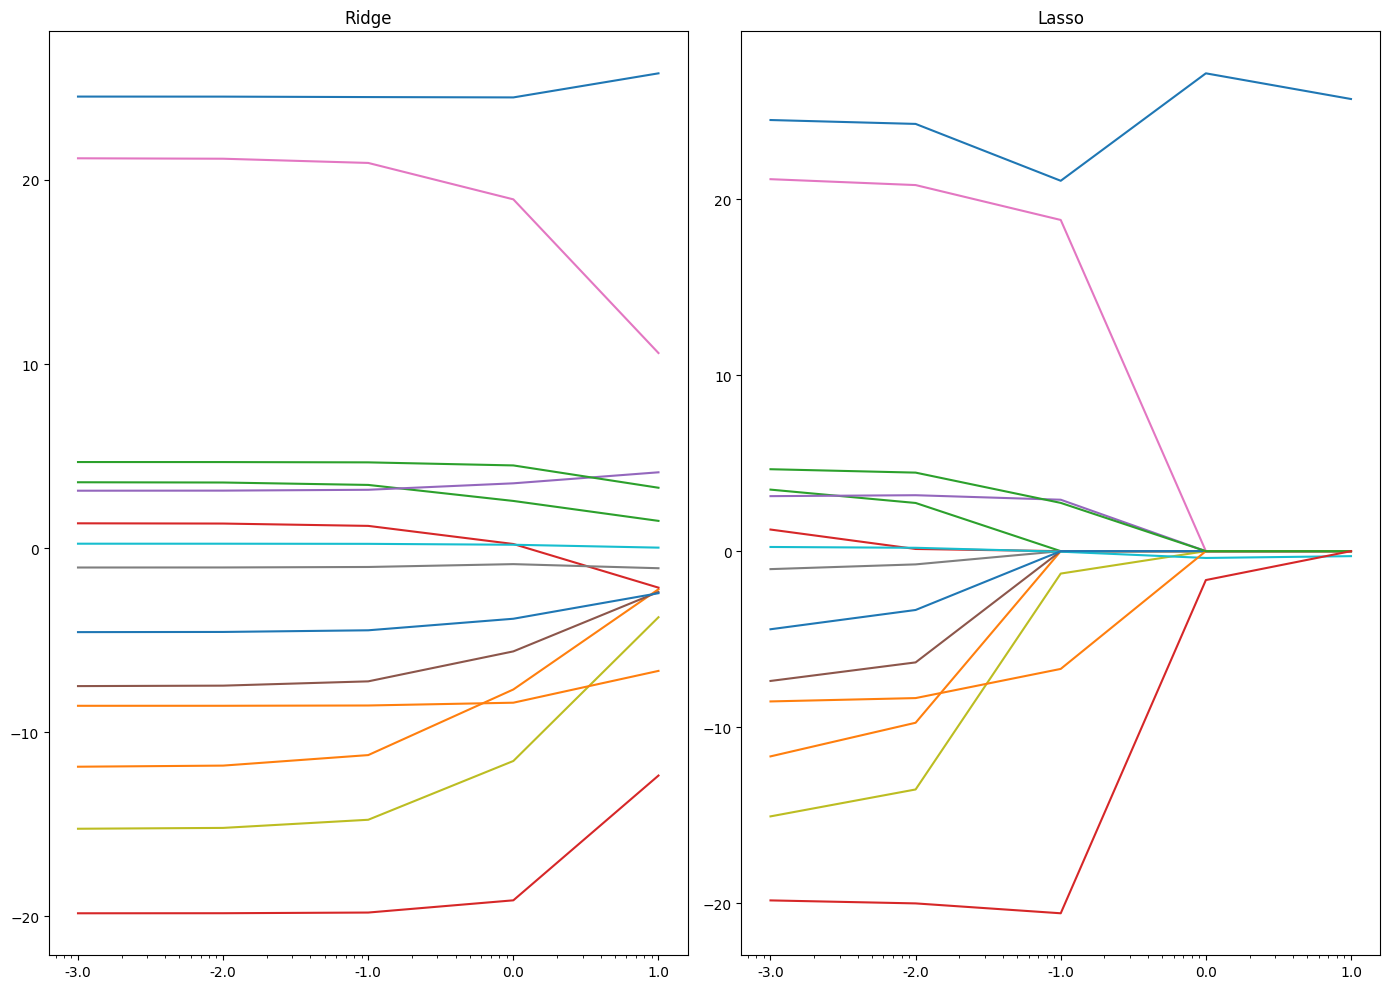

In [36]:
# 시각화
fig = plt.figure(figsize = (14, 10))

# Ridge
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels = np.log10(alpha))
plt.title("Ridge")
# LASSO
ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels = np.log10(alpha))
plt.title("Lasso")

plt.tight_layout()
plt.show()

## Prediction

In [37]:
y_pred_lm = lm.predict(X_test)

In [38]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE:", mean_squared_error(y_test, y_pred_lm))
print("MAE:", mean_absolute_error(y_test, y_pred_lm))

MSE: 21.517444231177258
MAE: 3.1627098714574102


In [39]:
for i in range(5):
  print(f"MSE of Ridge_{i}: {mean_squared_error(y_test, globals()[f'ridge_{i}'].predict(X_test))}")
  print(f"MAE of Ridge_{i}: {mean_absolute_error(y_test, globals()[f'ridge_{i}'].predict(X_test))}\n")

MSE of Ridge_0: 21.51661530849541
MAE of Ridge_0: 3.1625577715001185

MSE of Ridge_1: 21.509261831440302
MAE of Ridge_1: 3.1612670719350184

MSE of Ridge_2: 21.44560058907296
MAE of Ridge_2: 3.1491599464192976

MSE of Ridge_3: 21.386739276405734
MAE of Ridge_3: 3.1038371064780623

MSE of Ridge_4: 27.605028210671197
MAE of Ridge_4: 3.628469554948902



In [40]:
for i in range(5):
  print(f"MSE of Lasso_{i}: {mean_squared_error(y_test, globals()[f'lasso_{i}'].predict(X_test))}")
  print(f"MSE of Lasso_{i}: {mean_absolute_error(y_test, globals()[f'lasso_{i}'].predict(X_test))}\n")

MSE of Lasso_0: 21.502425954862904
MSE of Lasso_0: 3.1579584802159615

MSE of Lasso_1: 21.482701440392503
MSE of Lasso_1: 3.128486944468552

MSE of Lasso_2: 25.77152162656138
MSE of Lasso_2: 3.5138843126445374

MSE of Lasso_3: 63.39086651034682
MSE of Lasso_3: 5.983919570344294

MSE of Lasso_4: 66.82973444651407
MSE of Lasso_4: 6.106058599890918

